# Characteristics

* [Datasheet](https://www.we-online.com/components/products/datasheet/7427010.pdf)
* Core material: NiZn
* Operating temperature: –25 ºC to +125 ºC
* Size : OD 16.5mm, ID 8.0mm, H 13.0mm
* Material : 4 W 620
* Cost : €1.36/pce @ single piece

# 1-turn check

In [9]:
import sys
sys.path.insert(0, '../Calculations/')
from calcInductors import *


from calcInductors import calc_inductor_turns

f = 489.575e3 # [Hz]
Al = 997.97  # [nH/N²]
L = 1.33e-5 # [H] Minimum inductance for a 5x50ohm impedance at 3MHz
turns_ratio = 7

[Np, Ns] = calc_inductor_turns(Al, L, turns_ratio)
print("Required number of turns on primary winding: " + str(Np))
print("Required number of turns on secondary winding: " + str(Ns))

Required number of turns on primary winding: 4
Required number of turns on secondary winding: 28


# Winding the coil

In [10]:
from calcInductors import *

d = 0.5e-3 # [m] wire diameter
OD = 16.5e-3 # [m] outer diameter
ID = 8.0e-3 # [m] inner diameter
h = 13.0e-3 # [m] height

print("Primary coil wire length: " + str(calc_toroid_wirelength(OD, ID, d, h, Np))+"m")
print("Secondary coil wire length: " + str(calc_toroid_wirelength(OD, ID, d, h, Ns))+"m")

Primary coil wire length: 0.14m
Secondary coil wire length: 1.0m


# Measuring coil parameters

In [11]:
import skrf as rf
from calcInductors import calcSRF, transformer_bandwidth_calculation

f = 489.575e3 # [Hz]
Z_open = 798e-3 + 50.2j # [ohm]
Z_shorted = 103e-3 + 607e-3j # [ohm]

# Measured SRF = 4.82MHz

filepath = './measurements/WE_7427010/Z_open_secondary.s1p'

nw = rf.Network(filepath)

srf = calcSRF(nw)
print('SRF = {:.4}Hz and the resistance is {:.4}Ω'.format(srf[1], srf[0]))

transformer_bandwidth_calculation(f, srf[1], 2, 50, Z_open, Z_shorted)

SRF = 4.709e+06Hz and the resistance is 1.1e+03Ω
Leakage inductance = 1.97e-07H
Magnetization inductance = 1.61e-05H
Al = 4.03e+03 nH/N²
Cw = 7.08e-11 F
Low frequency cut-off (fl) = 4.94e+05Hz
High frequency cut-off due to winding capacitance = 4.49e+07Hz
High frequency cut-off due to resonance of winding capacitance and leakage inductance = 4.26e+07Hz


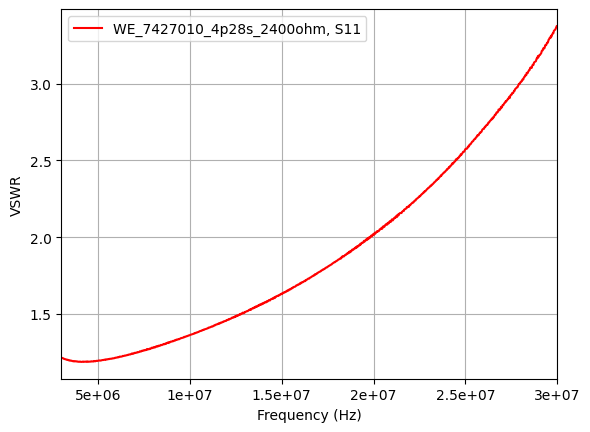

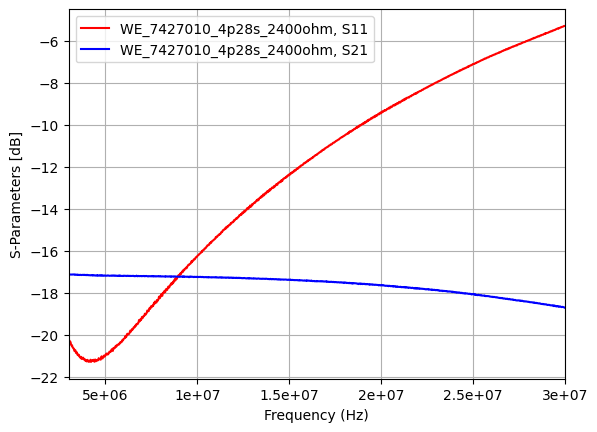

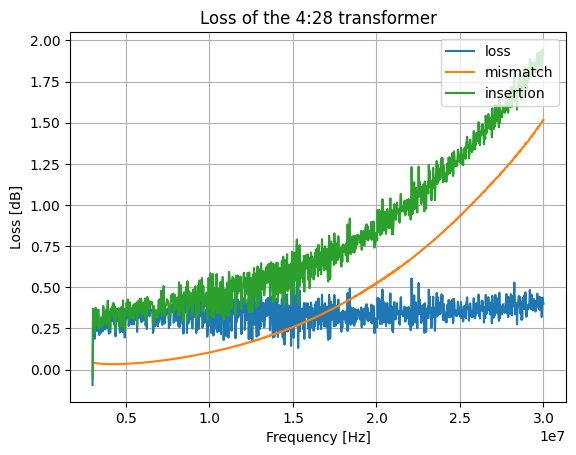

In [12]:
# Measure loss

from plotResults import plot_s_parameters, plot_transformer_loss, plot_vswr

nw = rf.Network('./measurements/WE_7427010/WE_7427010_4p28s_2400ohm.s2p')
nw_cal = rf.Network('./measurements/SIFERRIT/SIFERRIT_cal_2400ohm.s2p')

plot_vswr(nw)

plot_s_parameters(nw)
loss_db = plot_transformer_loss(nw, nw_cal, 'Loss of the 4:28 transformer')

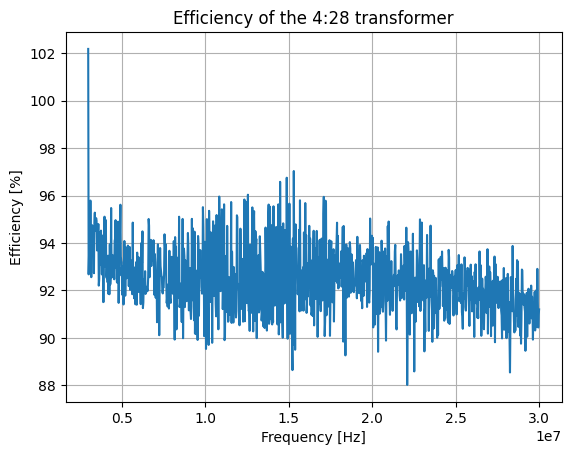

In [13]:
from plotResults import plot_efficiency

plot_efficiency(nw.f, loss_db,'Efficiency of the 4:28 transformer')

# Conclusion

* Good performance throughout the HF-band
* Slightly more expensive than the 2643625002.
* Slightly shorter than the 2643625002. So it could be used as a replacement for the 2643625002.
* 